In [ ]:
!gdown --fuzzy https://drive.google.com/file/d/1bvaXJJqNObOCkX-i475BNxpidk024pyx/view

Downloading...
From (original): https://drive.google.com/uc?id=1bvaXJJqNObOCkX-i475BNxpidk024pyx
From (redirected): https://drive.google.com/uc?id=1bvaXJJqNObOCkX-i475BNxpidk024pyx&confirm=t&uuid=ced5c7ff-8d72-46c3-b0a3-4dd55b8d0efb
To: /content/household_power_consumption.txt
100% 133M/133M [00:02<00:00, 52.3MB/s]


In [ ]:
import pandas as pd
import numpy as np

Observation:Here we have the Dataset i.e(household_power_consumption)...For this we have to PREDICT FUTURE VALUES ...for which the first step we have to perform the Data Exploration .....to understand the dataset....

In [ ]:
df = pd.read_csv('/content/household_power_consumption.txt',sep=";")


<ipython-input-4-68e29b680bbb>:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/household_power_consumption.txt',sep=";")


Observation: Initially here we are using... df.head()... to display the first 5 rows of dataset.



In [ ]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


Observation:Here we used df.info() to get the no.of columns and there Dtype to analyse the complete dataset ....



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


Observation:Now we are converting the Objects Dtype to Float Dtype of each column in the dataset.//errors=coerce (non convertible values)..





In [ ]:
df['Global_active_power']=pd.to_numeric(df['Global_active_power'],errors='coerce')
df['Global_reactive_power']=pd.to_numeric(df['Global_reactive_power'],errors='coerce')
df['Voltage']=pd.to_numeric(df['Voltage'],errors='coerce')
df['Global_intensity']=pd.to_numeric(df['Global_intensity'],errors='coerce')
df['Sub_metering_1']=pd.to_numeric(df['Sub_metering_1'],errors='coerce')
df['Sub_metering_2']=pd.to_numeric(df['Sub_metering_2'],errors='coerce')
df['Sub_metering_3']=pd.to_numeric(df['Sub_metering_3'],errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                float64
 5   Global_intensity       float64
 6   Sub_metering_1         float64
 7   Sub_metering_2         float64
 8   Sub_metering_3         float64
dtypes: float64(7), object(2)
memory usage: 142.5+ MB


In [ ]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


Observation:Here we used df.isnull().sum() to check for the missing values

Observation:Here we used df[col_name].unique() which finds the unique values

In [ ]:
df.isnull().sum()

,0
Date,0
Time,0
Global_active_power,25979
Global_reactive_power,25979
Voltage,25979
Global_intensity,25979
Sub_metering_1,25979
Sub_metering_2,25979
Sub_metering_3,25979


Observation:Here we used round() which rounds a number to specified number of decimal places

In [ ]:
round(100 * df.Sub_metering_3.isnull().sum()/len(df),2)

1.25

Observation:Here we used median() on the column Sub_metering_3

In [ ]:
df['Sub_metering_3'].median()

1.0

Observation:Here we use describe(include='object') will looks for the columns with object Dtype

In [ ]:
df.describe(include='object')

,Date,Time
count,2075259,2075259
unique,1442,1440
top,6/12/2008,17:24:00
freq,1440,1442


**Data Visualization**   
   -> Plot representions to visualize the data in an effective way.

   -> Here we use differnt libraries to visualize data which includes,
        "Matplotlib"
       and  "Seaborn".

**Importing Libraries** :

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
from matplotlib.dates import DateFormatter
from matplotlib.ticker import MaxNLocator

-> Convert the Date and Time into the single column for the better visualization.

In [ ]:
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S')

In [ ]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00


**Questions**

1.*Would you like to visualize how the global active power changes over time?*

**Line Graph** : Here we particularly used for plotting Global_active_power over time can help identify usage patterns, including peaks and troughs in power consumption.(i.e Time Series Analysis )

**Observation** :

.There are  fluctuations in power usage, with several peaks reaching above 10 kW.

. The power usage appears to have periodic increases and decreases, which could be due to daily or weekly consumption patterns.

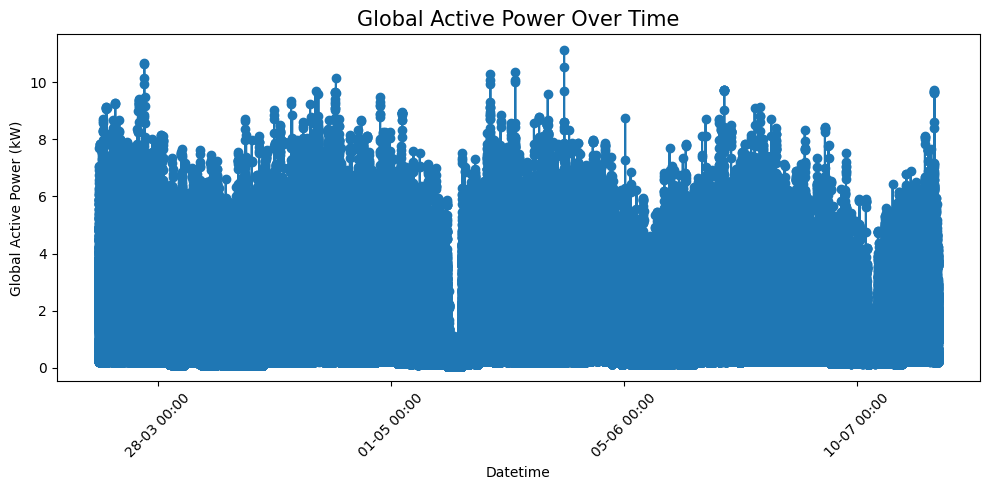

In [ ]:
# Line Plot for Global Active Power Consumption over time
plt.figure(figsize=(10, 5))
plt.plot(df['Datetime'], df['Global_active_power'], marker='o', linestyle='-')
plt.title('Global Active Power Over Time',fontsize=15) #Title
plt.xlabel('Datetime',fontsize=10) #X axis title
plt.ylabel('Global Active Power (kW)',fontsize=10) #Y axis title
plt.xticks(rotation=45,fontsize=10)
plt.yticks(fontsize=10)
ax = plt.gca()  # Get current axis
ax.xaxis.set_major_locator(MaxNLocator(nbins=5))  # Set maximum number of ticks
ax.xaxis.set_major_formatter(DateFormatter('%d-%m %H:%M'))  # Format date labels
plt.tight_layout() #prevent overlap between elements of the plot, such as labels, titles, and axes.
plt.show()

2.*Analyze the relationship between Global Active Power and Global Reactive Power?*

**Scatter Plot** : Here we are trying to explore the correlation between Global Active Power and Global Reactive Power, which help understand power efficiency.


**Observation**

. The data points show a clear triangular pattern, with most values concentrated between 0 to 6 kW for active power and 0 to 0.8 kVAR for reactive power.

. There are some points where the reactive power spikes independently of active power, indicating  high reactive power without a proportional increase in active power.

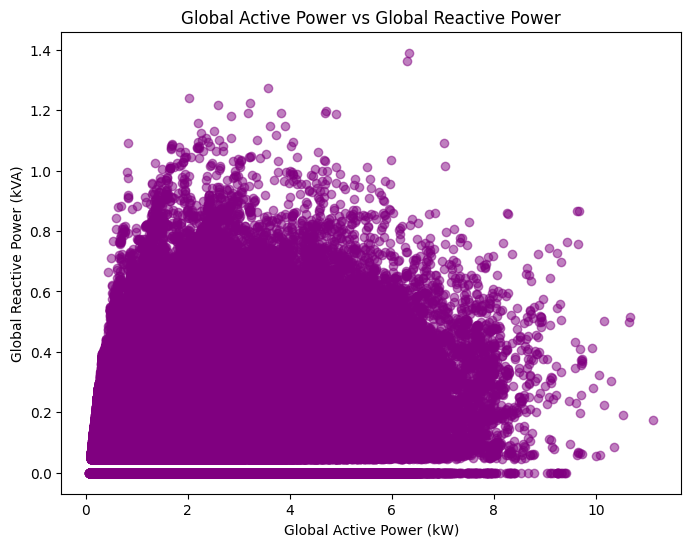

In [ ]:
# Scatter plot of Global Active Power vs Global Reactive Power
plt.figure(figsize=(8, 6))
plt.scatter(df['Global_active_power'], df['Global_reactive_power'], alpha=0.5, color='purple')
plt.title('Global Active Power vs Global Reactive Power')
plt.xlabel('Global Active Power (kW)')
plt.ylabel('Global Reactive Power (kVA)')
plt.show()


3.*How does Global Intensity vary with Global Active Power?*

**Scatter plot** : Here we are plotting Global_intensity against Global_active_power helps us to see if higher power usage leads to higher current levels.

**Observation**

. In below graph we can see that the plot is almost linear,which means both variables on X axis,Y axis have linear relationship.

. The linear correlation implies that the electrical load behaves in a predictable manner, with current increasing steadily as power consumption increases.

.The strong linear pattern also suggests minimal noise or anomalies in the data, indicating reliable and consistent power and current measurements.

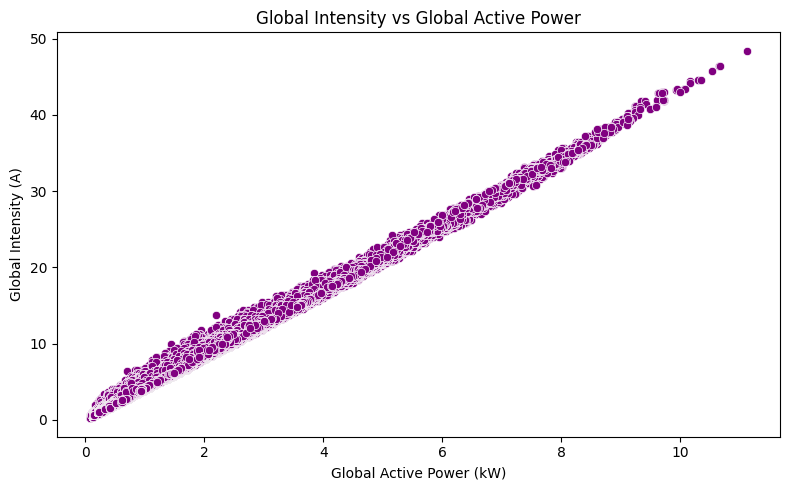

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Global_active_power', y='Global_intensity', data=df, color='purple')
plt.xlabel('Global Active Power (kW)')
plt.ylabel('Global Intensity (A)')
plt.title('Global Intensity vs Global Active Power')
plt.tight_layout()
plt.show()


4.*How does Sub Metering 1, 2, and 3 vary over time?*

 -> Here we are plotting Sub_metering_1, Sub_metering_2, and Sub_metering_3 over time shows energy consumption in each sub-meter.

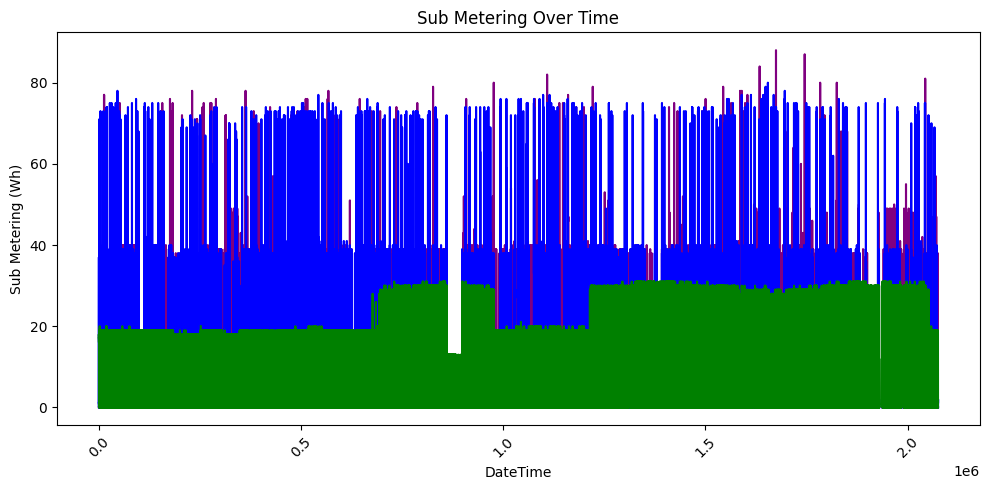

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Sub_metering_1'], label='Sub_metering_1', color='purple') # Sub metering 1
plt.plot(df.index, df['Sub_metering_2'], label='Sub_metering_2', color='blue')   # Sub metering 2
plt.plot(df.index, df['Sub_metering_3'], label='Sub_metering_3', color='green')  # Sub metering 3
plt.xlabel('DateTime')
plt.ylabel('Sub Metering (Wh)')
plt.title('Sub Metering Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


5.*What is the contribution of each Sub Meter to the total power consumption?*

**Bar Chart** : Here this bar chart visualizes the relative contribution of each sub-meter to the total consumption.

**Observation**

-> Here in the below plot the Sub Metering 3 has high power consumption.

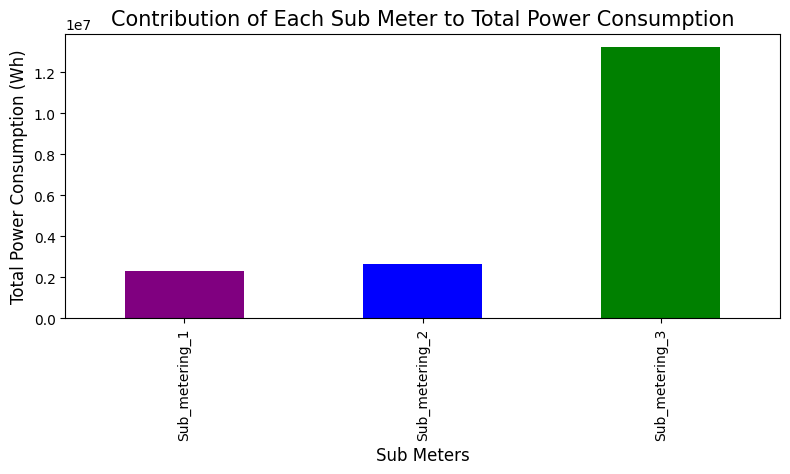

In [ ]:
plt.figure(figsize=(8, 5))
total_power = df[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].sum()
total_power.plot(kind='bar', color=['purple', 'blue', 'green'])
plt.xlabel('Sub Meters' , fontsize=12)
plt.ylabel('Total Power Consumption (Wh)',fontsize=12)
plt.title('Contribution of Each Sub Meter to Total Power Consumption',fontsize=15)
plt.tight_layout()
plt.show()


6.*What is the distribution of Global Reactive Power values?*

**Histogram** :  A histogram shows the distribution of Global_reactive_power, revealing typical values and any skewness.

**Observation**

-> The distribution of Global Reactive Power is highly skewed to the right, with most values concentrated at the low end.

->This positive skewness indicates that the system generally consumes low reactive power, suggesting efficient power usage.

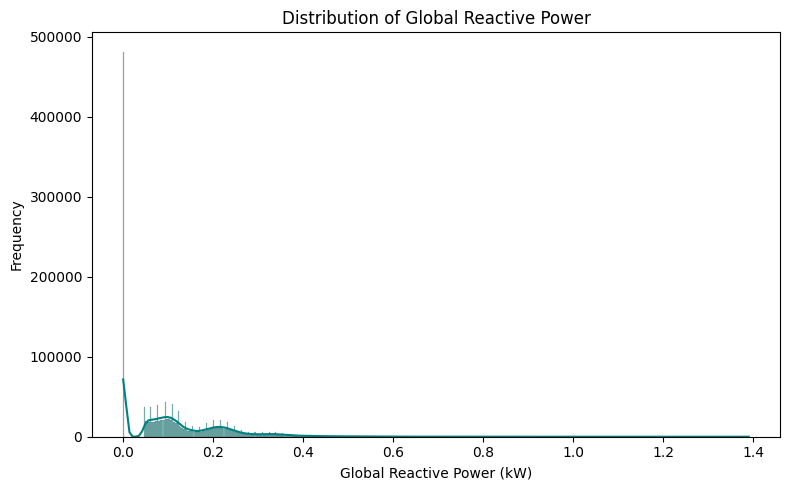

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Global_reactive_power'], kde=True, color='teal')
plt.xlabel('Global Reactive Power (kW)')
plt.ylabel('Frequency')
plt.title('Distribution of Global Reactive Power')
plt.tight_layout()
plt.show()


6.*What is the proportion of energy consumption for each sub-metering area (Sub_metering_1, Sub_metering_2, and Sub_metering_3) relative to the total power consumption?*

**Pie Chart** :  By visualizing in a pie chart, we can easily see the percentage of total power consumption attributed to each sub-meter.

-> This can help identify which areas or devices consume the most power and allow for more effective energy management.

**Observation**

->Here the sub_metering 3 have the highest percentage of Energy Consumption among all the Sub metering areas.

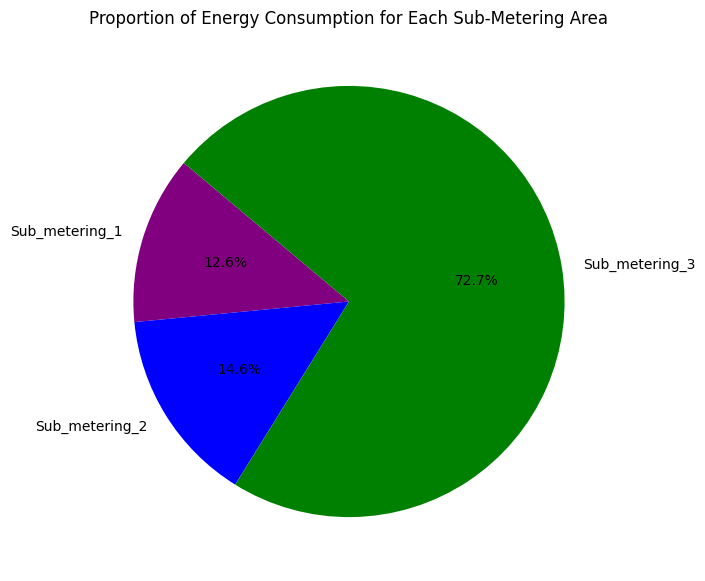

In [ ]:
import matplotlib.pyplot as plt

# Calculate the total consumption for each sub-metering area
total_sub_metering = df[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].sum()

# Labels for the pie chart
labels = ['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

# Plotting the pie chart
plt.figure(figsize=(7, 7))
plt.pie(total_sub_metering, labels=labels, autopct='%1.1f%%', startangle=140, colors=['purple', 'blue', 'green'])
plt.title('Proportion of Energy Consumption for Each Sub-Metering Area')
plt.show()


7.*Is there any correlation between the different variables in the dataset, such as Global_active_power, Global_reactive_power, Voltage, Global_intensity, and the three sub-metering values?*

**Heat Map** : Here this heatmap will display the correlation values between each pair of variables, ranging from -1 (strong negative correlation) to +1 (strong positive correlation).

-> Values close to 0 indicate little to no linear relationship.

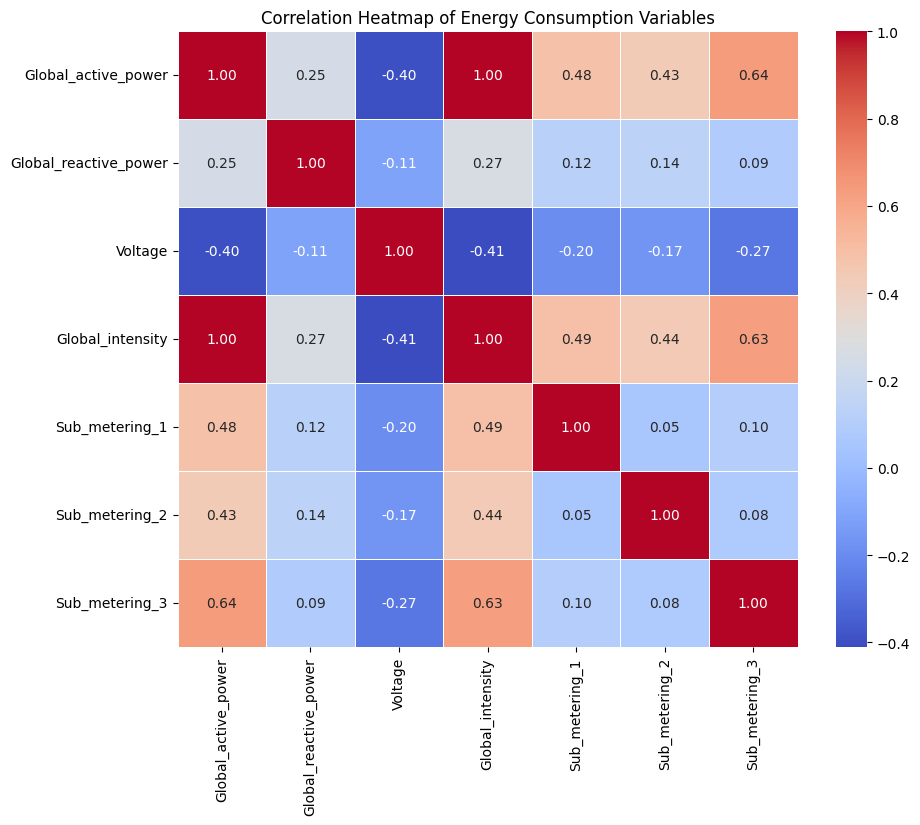

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity',
                         'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].corr()
# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5) #annot for displaying the correlation values,cmap for color map
plt.title('Correlation Heatmap of Energy Consumption Variables')
plt.show()


**Pairplot** : * It will help us understand how these energy-related metrics are related to each other.*

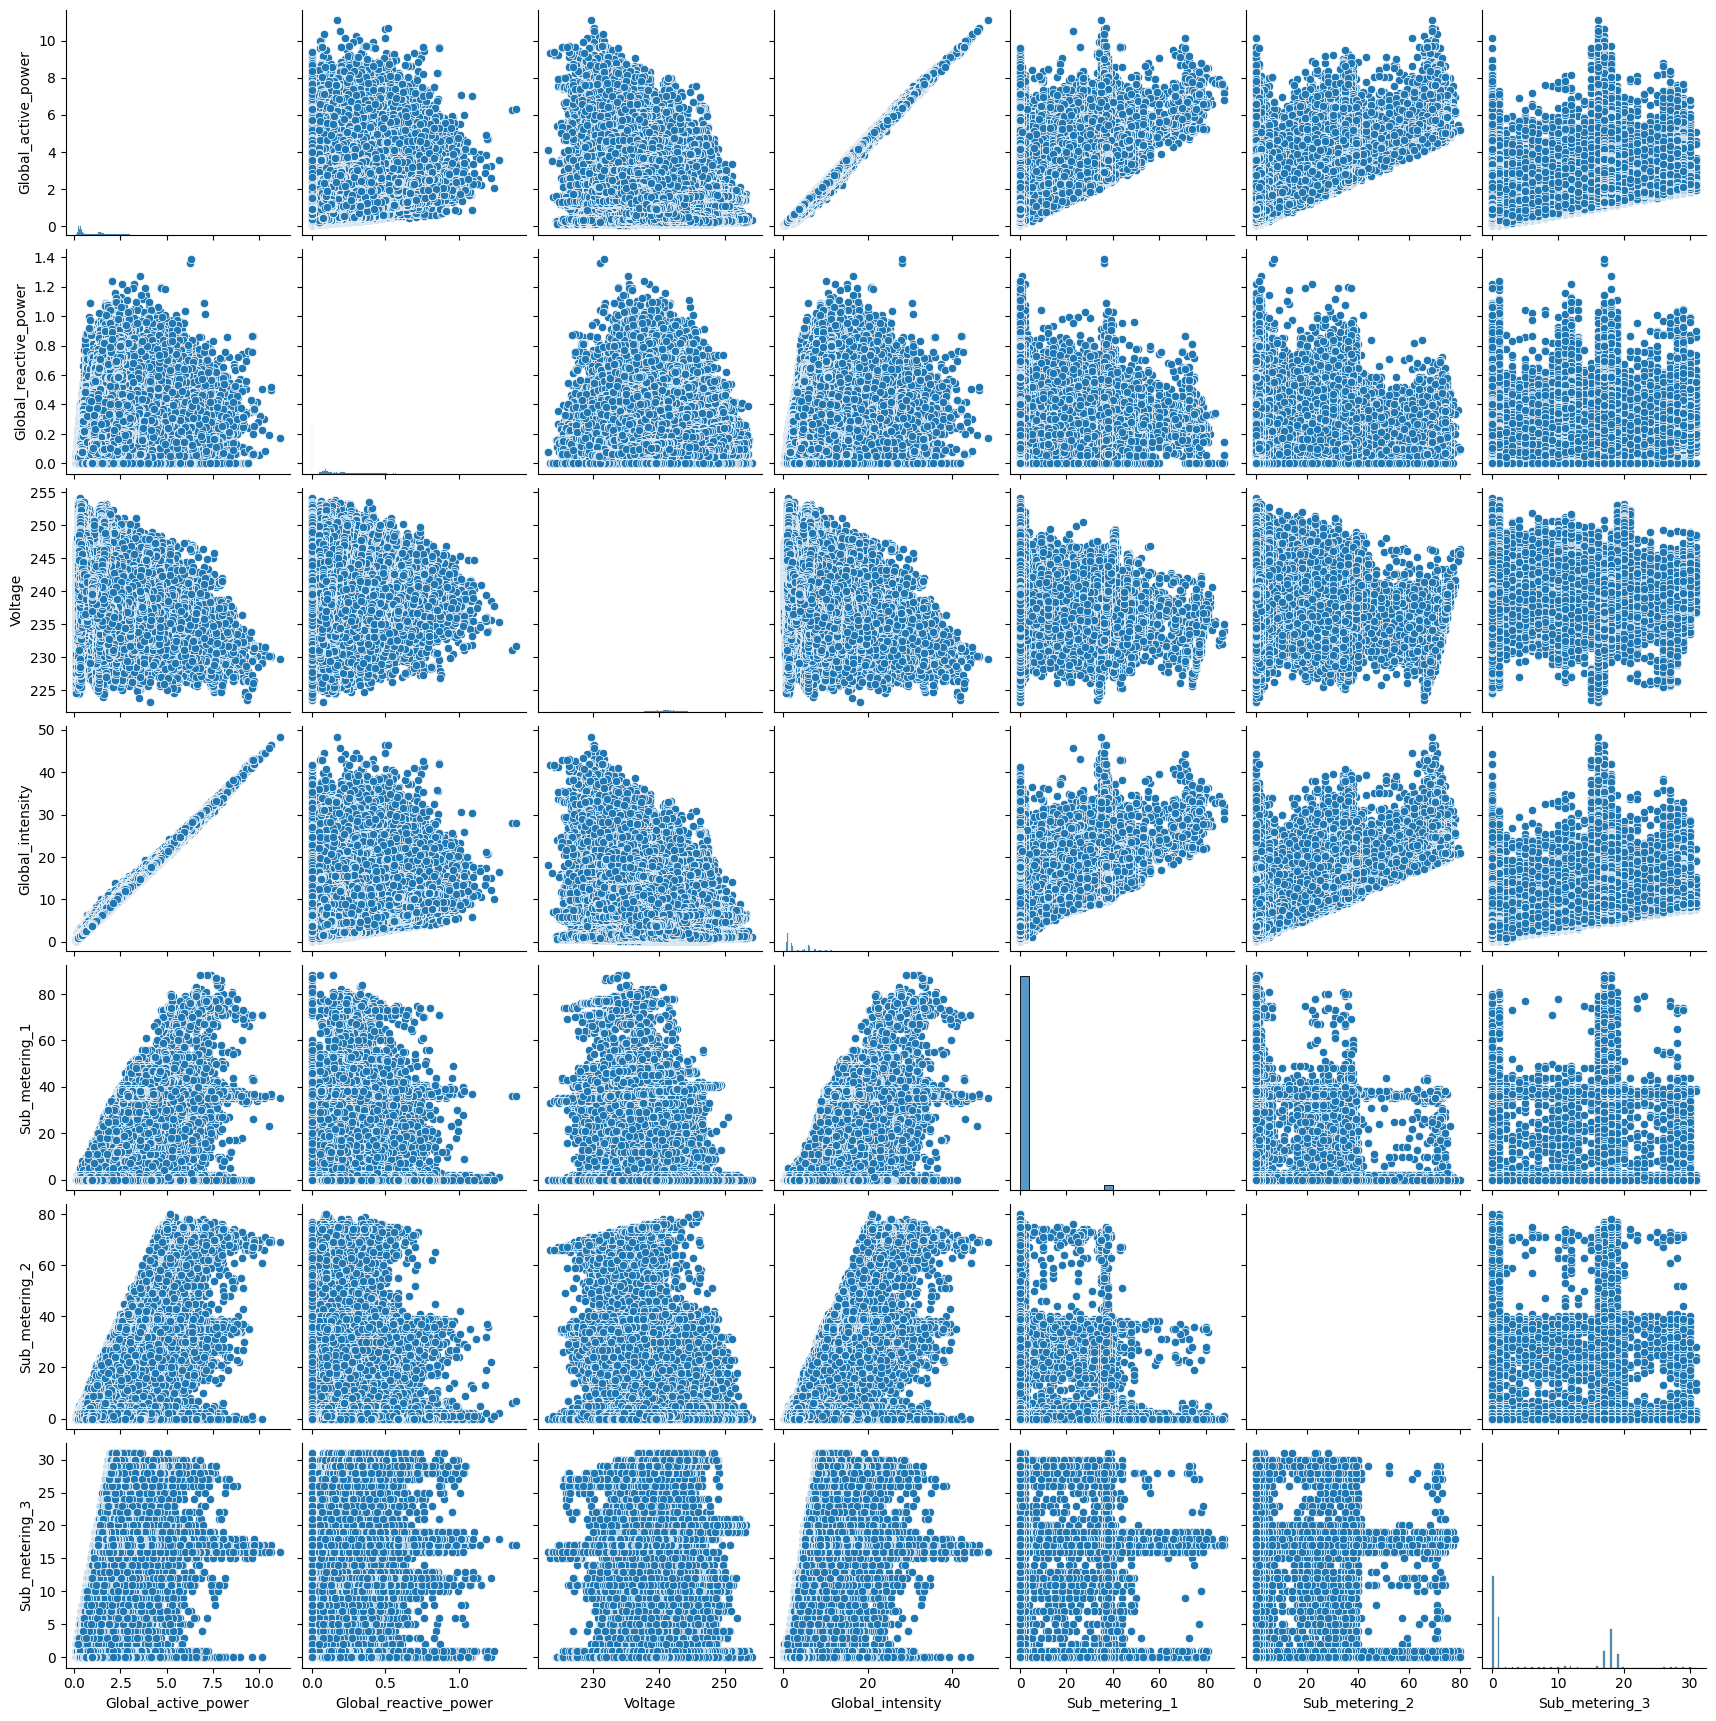

In [ ]:
sns.pairplot(df)

**Data Conversion** Here we are converting data to the proper type to perform the future prediction.

* Convert date and time from string to date(Year, Month, Day) & time(Hours, minutes) format.

In [ ]:
df['Year'] = df['Datetime'].dt.year
df['Month'] = df['Datetime'].dt.month
df['Day'] = df['Datetime'].dt.day
df['Hour'] = df['Datetime'].dt.hour
df['Minute'] = df['Datetime'].dt.minute
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime,Year,Month,Day,Hour,Minute
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00,2006,12,16,17,24
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00,2006,12,16,17,25
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00,2006,12,16,17,26
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00,2006,12,16,17,27
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00,2006,12,16,17,28


In [ ]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime,Year,Month,Day,Hour,Minute
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2075259,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00,2008-12-06 07:12:59.999994112,2.008437e+03,6.450359e+00,1.577363e+01,1.150076e+01,2.950017e+01
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,2006-12-16 17:24:00,2.006000e+03,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2007-12-12 00:18:30,2.007000e+03,3.000000e+00,8.000000e+00,6.000000e+00,1.500000e+01
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2008-12-06 07:13:00,2.008000e+03,6.000000e+00,1.600000e+01,1.200000e+01,3.000000e+01
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01,2009-12-01 14:07:30,2.009000e+03,9.000000e+00,2.300000e+01,1.800000e+01,4.500000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01,2010-11-26 21:02:00,2.010000e+03,1.200000e+01,3.100000e+01,2.300000e+01,5.900000e+01
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00,NaN,1.128677e+00,3.415762e+00,8.787773e+00,6.922227e+00,1.731810e+01


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 15 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Date                   object        
 1   Time                   object        
 2   Global_active_power    float64       
 3   Global_reactive_power  float64       
 4   Voltage                float64       
 5   Global_intensity       float64       
 6   Sub_metering_1         float64       
 7   Sub_metering_2         float64       
 8   Sub_metering_3         float64       
 9   Datetime               datetime64[ns]
 10  Year                   int32         
 11  Month                  int32         
 12  Day                    int32         
 13  Hour                   int32         
 14  Minute                 int32         
dtypes: datetime64[ns](1), float64(7), int32(5), object(2)
memory usage: 197.9+ MB


**Data Visualization**:

**Questions**:

1.How do yearly averages of global active power, global reactive power, and voltage differ?

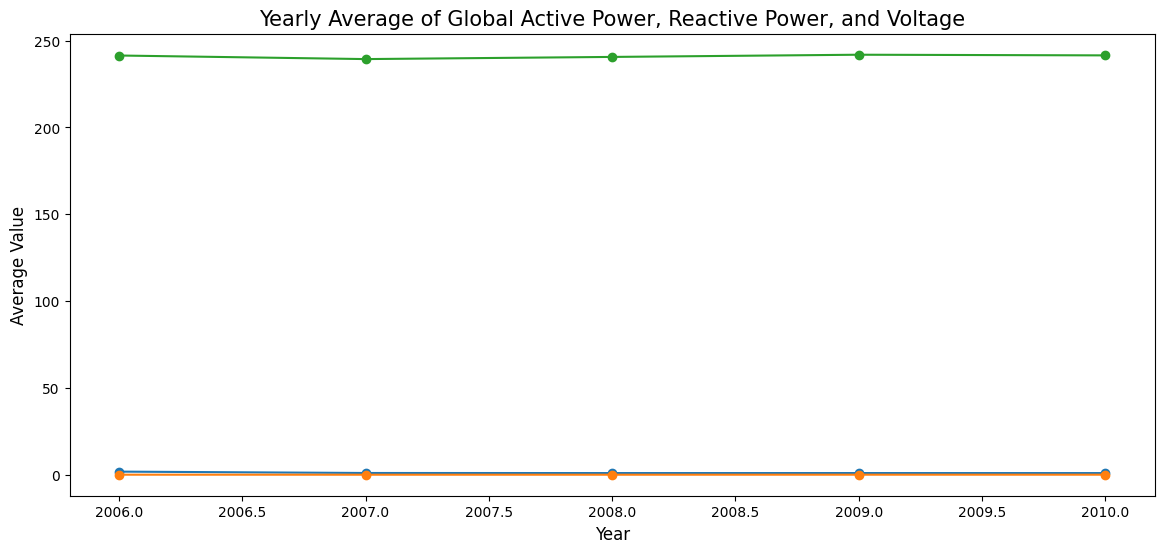

In [ ]:

yearly_data = df.groupby('Year')[['Global_active_power', 'Global_reactive_power', 'Voltage']].mean().reset_index()

# Plot yearly trends
plt.figure(figsize=(14, 6))
plt.plot(yearly_data['Year'], yearly_data['Global_active_power'], label='Global Active Power', marker='o')
plt.plot(yearly_data['Year'], yearly_data['Global_reactive_power'], label='Global Reactive Power', marker='o')
plt.plot(yearly_data['Year'], yearly_data['Voltage'], label='Voltage', marker='o')
plt.xlabel('Year',fontsize=12)
plt.ylabel('Average Value',fontsize=12)
plt.title('Yearly Average of Global Active Power, Reactive Power, and Voltage',fontsize=15)
plt.show()


**Observations**:

**Green Line**  (Voltage): This line is near the top of the graph, showing that the average voltage is consistently high across each year, close to 240 volts.

**Orange Line** (Global Reactive Power): This line is very close to the bottom of the graph, meaning that the average global reactive power is low in comparison to the voltage.

**Blue Line** (Global Active Power): This line is also close to the bottom of the graph, slightly above the global reactive power line.

->There is no significant trend or variation in any of the parameters across the years; all lines are relatively flat, showing consistency over time.

2.What are the average hourly trends in global active power, global reactive power, and global intensity across a day?

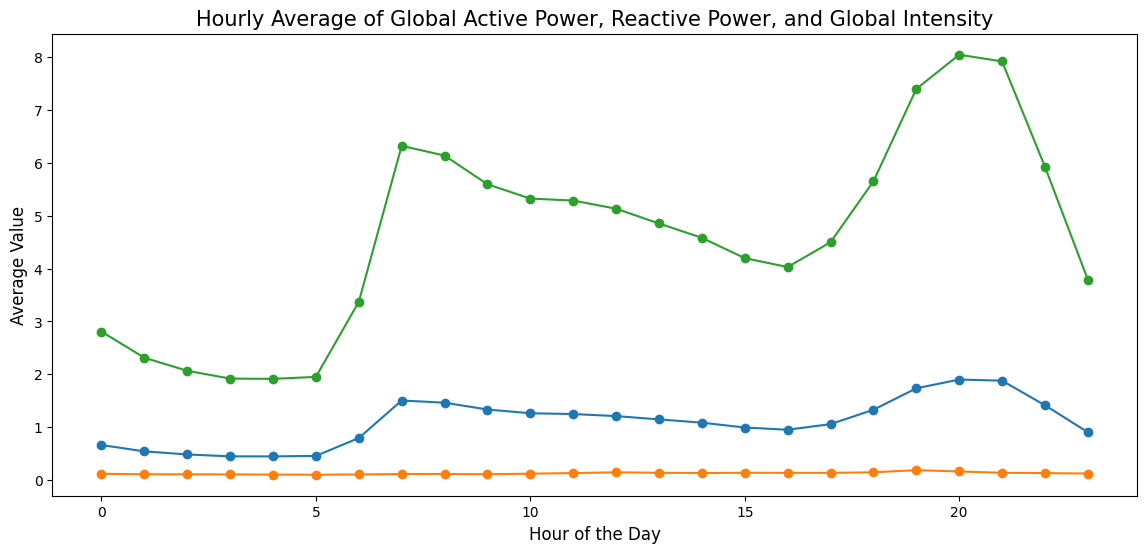

In [ ]:

hourly_data = df.groupby('Hour')[['Global_active_power', 'Global_reactive_power', 'Global_intensity']].mean().reset_index()

# Plot hourly trends
plt.figure(figsize=(14, 6))
plt.plot(hourly_data['Hour'], hourly_data['Global_active_power'], label='Global Active Power', marker='o')
plt.plot(hourly_data['Hour'], hourly_data['Global_reactive_power'], label='Global Reactive Power', marker='o')
plt.plot(hourly_data['Hour'], hourly_data['Global_intensity'], label='Global Intensity', marker='o')
plt.xlabel('Hour of the Day',fontsize=12)
plt.ylabel('Average Value',fontsize=12)
plt.title('Hourly Average of Global Active Power, Reactive Power, and Global Intensity',fontsize=15)
plt.show()


**Observations**:

.Here there is changes in the voltage which is high and low for every five hours per day.

.The Global_reactive_power is at the bottom with no changes,as it is low.

. The Global_active_power is slightly above the global_reactive_power and there are little changes in it for every five hours per day.

3.How do yearly averages of sub-metering values (Sub_metering_1, Sub_metering_2, Sub_metering_3) change over time?

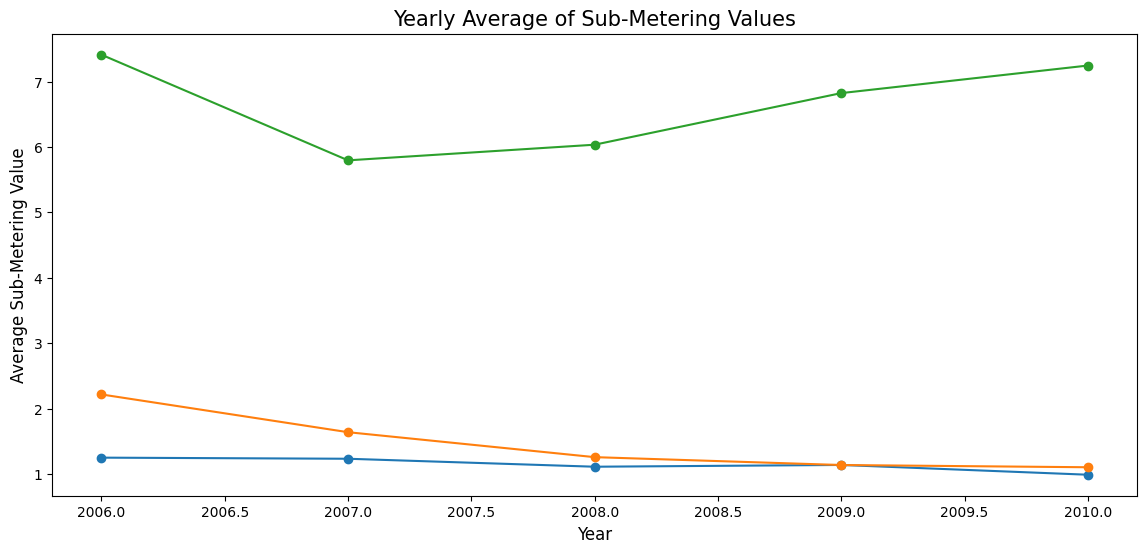

In [ ]:
yearly_submetering = df.groupby('Year')[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].mean().reset_index()

# Plot yearly trends in sub-metering
plt.figure(figsize=(14, 6))
plt.plot(yearly_submetering['Year'], yearly_submetering['Sub_metering_1'], label='Sub Metering 1', marker='o')
plt.plot(yearly_submetering['Year'], yearly_submetering['Sub_metering_2'], label='Sub Metering 2', marker='o')
plt.plot(yearly_submetering['Year'], yearly_submetering['Sub_metering_3'], label='Sub Metering 3', marker='o')
plt.xlabel('Year',fontsize=12)
plt.ylabel('Average Sub-Metering Value',fontsize=12)
plt.title('Yearly Average of Sub-Metering Values',fontsize=15)
plt.show()


**Observation**:

In the above graph

Green Line (Sub_metering_3)

Orange Line (Sub_metering_2)

Blue Line (Sub_metering_1)

->**Green line** starts with the highest average value in 2006, slightly above 7, and then drops in 2007.

.From 2007 onwards, the values increase steadily each year, reaching the highest point in 2010.

->**Orange line** shows a consistent decline from 2006 to 2010.

.The values start above 2 in 2006 and gradually decrease to just above 1 by 2010.

-> **Blue line** is the lowest among the three and remains nearly constant, with only a slight decline over the years.


* Find whether the day is a holiday or not (0 = not holiday, 1= holiday)
* Find if the there is sunlight during the time given in the dataset ( 0600-1800 hours ---1 (light is there) else 0)

**Observation**:
 . In the result here we can observe that for the  **last 5 rows in the dataset ** there is no Holiday (0) and also there is no sunlight (0) during the time given in the dataset.

In [ ]:
import datetime as dt

def is_holiday(date):
    year = int(date.split('/')[2])
    month = int(date.split('/')[1])
    day = int(date.split('/')[0])

    if dt.datetime(year, month, day).weekday() >= 5:
        return 1.0
    else:
        return 0.0

for data in [df]:
    data['Is_holiday'] = data['Date'].apply(lambda x: is_holiday(x))
    data['Light']      = data['Time'].apply(lambda x: 1 if int(x[:2]) >= 6 and int(x[:2]) < 18 else 0)
    data['Time']       = data['Time'].apply(lambda x: (int(x[:2]) * 60.0 + int(x[3:5])) / 1440.0)

In [ ]:
df.tail()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime,Year,Month,Day,Hour,Minute,Is_holiday,Light
2075254,26/11/2010,0.873611,0.946,0.0,240.43,4.0,0.0,0.0,0.0,2010-11-26 20:58:00,2010,11,26,20,58,0.0,0
2075255,26/11/2010,0.874306,0.944,0.0,240.00,4.0,0.0,0.0,0.0,2010-11-26 20:59:00,2010,11,26,20,59,0.0,0
2075256,26/11/2010,0.875000,0.938,0.0,239.82,3.8,0.0,0.0,0.0,2010-11-26 21:00:00,2010,11,26,21,0,0.0,0
2075257,26/11/2010,0.875694,0.934,0.0,239.70,3.8,0.0,0.0,0.0,2010-11-26 21:01:00,2010,11,26,21,1,0.0,0
2075258,26/11/2010,0.876389,0.932,0.0,239.55,3.8,0.0,0.0,0.0,2010-11-26 21:02:00,2010,11,26,21,2,0.0,0




-> Lineplot for the global_active_power for Year,month,Day.

Text(0.5, 1.0, 'Mean global active power by day for a month')

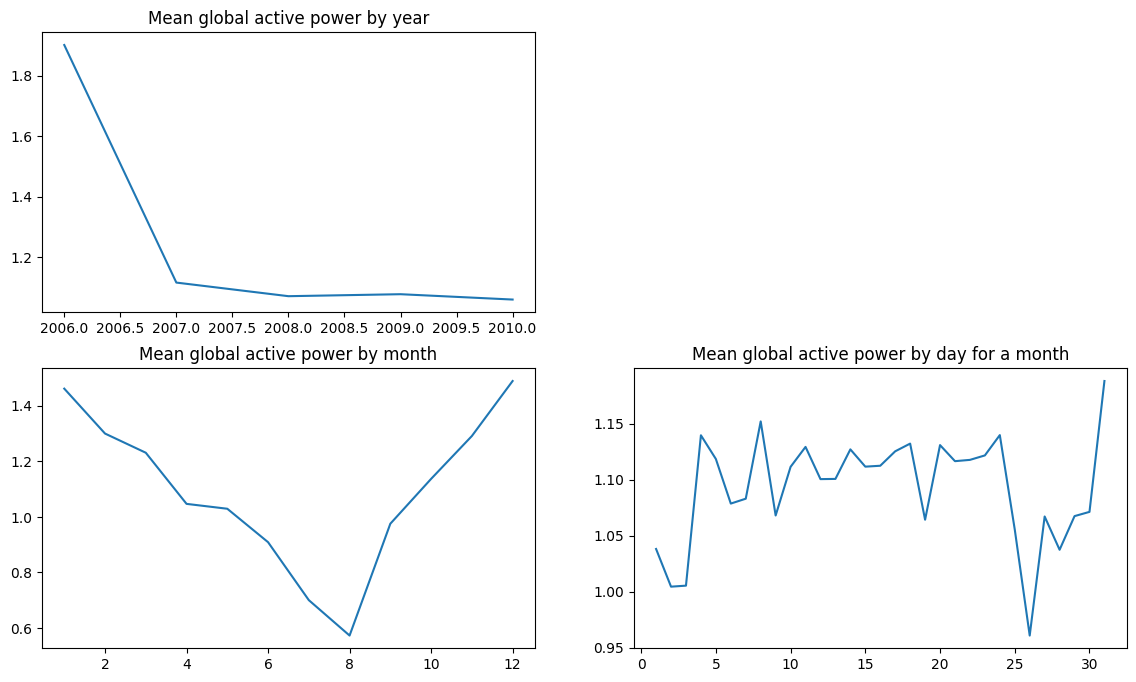

In [ ]:
plt.figure(figsize=(14,8))
plt.subplot(2,2,1)
df.groupby('Year').Global_active_power.agg('mean').plot()
plt.xlabel('')
plt.title('Mean global active power by year')



plt.subplot(2,2,3)
df.groupby('Month').Global_active_power.agg('mean').plot()
plt.xlabel('')
plt.title('Mean global active power by month')

plt.subplot(2,2,4)
df.groupby('Day').Global_active_power.agg('mean').plot()
plt.xlabel('')
plt.title('Mean global active power by day for a month')

**Observation**:

. In the result here we can observe that for the *first 5 rows in the dataset * there is Holiday (1) and also there is sunlight (1) during the time given in the dataset.

In [ ]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime,Year,Month,Day,Hour,Minute,Is_holiday,Light
0,16/12/2006,0.725000,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00,2006,12,16,17,24,1.0,1
1,16/12/2006,0.725694,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00,2006,12,16,17,25,1.0,1
2,16/12/2006,0.726389,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00,2006,12,16,17,26,1.0,1
3,16/12/2006,0.727083,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00,2006,12,16,17,27,1.0,1
4,16/12/2006,0.727778,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00,2006,12,16,17,28,1.0,1


**Predictions using Machine Learning Models**:

*Basic ML Models* :


*   Linear Regression
*   Lasso Regression

*   Ridge Regression






**Linear Regression** : It is a statistical method that is used for predictive analysis. Linear regression makes predictions for continuous/real or numeric variables.



*  It shows the linear relationship, which means it finds how the value of the dependent variable is changing according to the value of the independent variable.



* This model provides a sloped straight line representing the relationship between the variables.


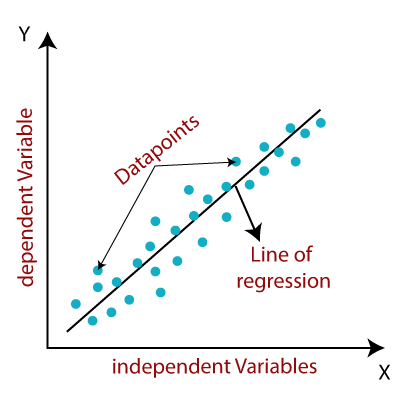


Mathematically, we can represent a linear regression as:

y= a0+a1x+ ε

Here

Y= Dependent Variable (Target Variable)

X= Independent Variable (predictor Variable)

a0= intercept of the line (Gives an additional degree of freedom)

a1 = Linear regression coefficient (scale factor to each input value)

ε = random error


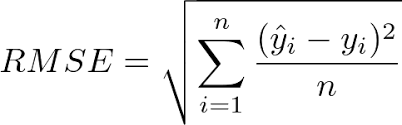



**Implementation of Linear Regression**

**Steps**:



*   Select the feature and target columns.
*   Decide the variables predict (target), such as Global_active_power

 choose the predictors (features), such as Voltage, Global_intensity, etc.



*   Split the data into training and testing sets.

*   Use a linear regression model to train on the dataset.


*   Evaluate the model's accuracy by using  Mean Squared Error (MSE) or R-squared.











Mean Squared Error: 0.0016377913601743103
R-squared: 0.9985301207233462


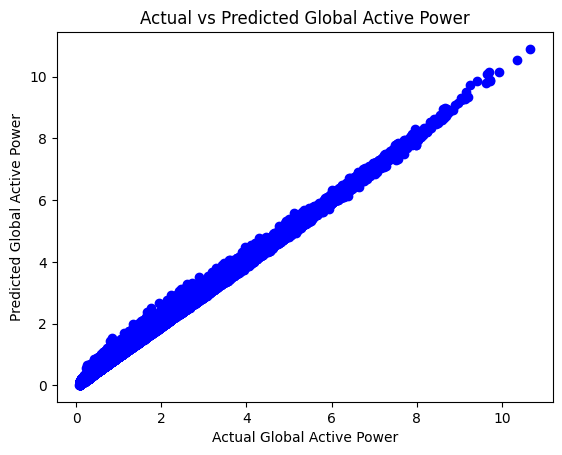

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Convert columns to numeric, coercing errors to NaN for handling
columns_to_convert = ['Global_active_power', 'Global_reactive_power', 'Voltage',
                      'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
for column in columns_to_convert:
    df[column] = pd.to_numeric(df[column], errors='coerce')
# Drop rows with NaN values
df.dropna(inplace=True)
# Features: Use all available numerical columns except the target
X = df[['Global_reactive_power', 'Voltage', 'Global_intensity',
        'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']]
y = df['Global_active_power']
# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Train the Model
model = LinearRegression()
model.fit(X_train, y_train)
# Make Predictions
y_pred = model.predict(X_test)
# Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
# Visualization of model
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel("Actual Global Active Power")
plt.ylabel("Predicted Global Active Power")
plt.title("Actual vs Predicted Global Active Power")
plt.show()


**Observations :**

 ->The above **Scatter plot**  illustrates the relationship between actual and predicted values of **Global Active Power** in a linear regression model.

 ->**Blue dot :** Each blue dot represents an (actual, predicted) pair from the test set.

 -> The data points align closely along a 45-degree diagonal line from the bottom left to the top right, indicating a strong positive correlation between actual and predicted values. This means the model's predictions are very **accurate.**


 ->As per the scatter plot we obtained, the model has low error and is effectively predicting Global Active Power values.

 ->There are a few points at the upper right (near Global Active Power values of around 10) where predictions slightly deviate from the diagonal,indicate minor over- or under-predictions in some high-value cases.



*   **Mean Squared Error (MSE):** 0.0016 — This very low MSE value suggests that the squared difference between predicted and actual Global Active Power values is minimal.

*   **R-squared**: 0.9985 — An R-squared value of 0.9985 means that **99.85%** of the variance in the target variable (Global Active Power) is explained by the model's features.

 ->This is a very high value, showing that the model fits the data extremely well and can effectively predict Global Active Power based on the input features.

 **Accuracy :** Linear Regression Shows the **99.85%** of Accuracy in predicting the values of Global_active_power.




**Lasso Regression :**

->Lasso (Least Absolute Shrinkage and Selection Operator) regression belongs to regularization techniques category, which is usually applied to avoid **overfitting**.

->Lasso Regression enhance the linear regression which can be helpful if there are many features and you want to perform feature selection.



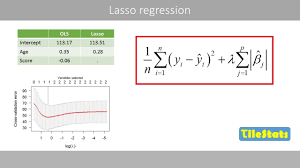


**Implementation of Lasso Regression :**

**Steps :**


*  Similar to linear regression;

Global_active_power is used as the target variable

The remaining columns are used as features.


*  The data is split into training and test sets.


*  The Lasso model is created with a regularization parameter alpha.A smaller alpha  reduces regularization, while a larger alpha increases it, potentially setting more coefficients to zero. Adjust alpha based on the dataset.


*  The mean_squared_error and r2_score are used to assess the model's performance.






Mean Squared Error: 0.0020240872512931126
R-squared: 0.9981834292345405


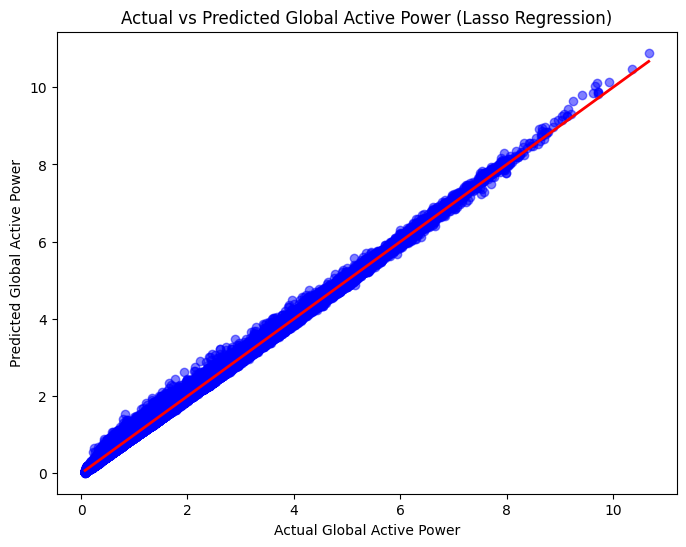

In [ ]:
from sklearn.linear_model import Lasso
# Train the Lasso Regression Model
# alpha is the regularization parameter; adjust it as needed
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train, y_train)
# Make Predictions
y_pred = lasso_model.predict(X_test)

# Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
#  Visualization
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, label='Ideal Fit')
plt.xlabel("Actual Global Active Power")
plt.ylabel("Predicted Global Active Power")
plt.title("Actual vs Predicted Global Active Power (Lasso Regression)")
plt.show()


**Observations :**

-> The above **Scatter plot** shows the relationship between actual and predicted values of Global Active Power using a Lasso Regression model.

->**Blue Dots :** Each blue dot represents an (actual, predicted) pair from the test set.

 The clustering of points along a line suggests a strong correlation between actual and predicted values.

 ->**Red Line**: The red line represents the ideal line of perfect prediction, where the predicted values would exactly match the actual values.

 ->The points are closely aligned along the red line, indicating that the Lasso Regression model is predicting values close to the actual values.

 -> The deviations are minimal, showing that the model has relatively low error.

 -> The alignment of the points with the ideal line suggests that the Lasso Regression model provides a **high level of accuracy**in predicting Global Active Power.

**Mean Squared Error (MSE):** 0.0020 — This low MSE indicates that,the squared differences between predicted and actual values are minimal, suggesting that the model's predictions are close to the actual values.

**R-squared (R²)**: 0.9982 — An R-squared value of 0.9982 means that **99.82**% of the variance in the target variable (Global Active Power) is explained by the model's features. This high R-squared value indicates that the model  implies a good fit and strong predictive capability.

**Accuracy** **:** Lasso Regression Shows the **99.82%** of Accuracy in predicting the values of Global_active_power.

**COMPARISION**

 **Linear Regression vs Lasso Regression :**

 ->Compared to simple linear regression, the Lasso Regression model has a slightly higher MSE and a slightly lower R-squared.


 ->As Lasso applies an L1 regularization penalty, which can slightly reduce accuracy but also helps to prevent overfitting by shrinking less important feature coefficients toward zero.


 -> Lasso Regression model is performing very well, with a minor trade-off in accuracy compared to simple linear regression, but with the added benefit of **feature selection through regularization**. This could make the model more **robust**.








**Ridge Regression :**

-> It a technique used in linear regression to address the problem of multicollinearity among predictor variables.

-> Multicollinearity occurs when independent variables in a regression model are highly correlated, which can lead to unreliable and unstable estimates of regression coefficients.



**Implementation of Ridge Regression :**

**Steps:**



*  The target variable is Global_active_power, and the remaining columns are used as features.


*  The data is divided into training and test sets.

*   The Ridge model is created with a regularization parameter alpha.
 Higher values of alpha increase the regularization strength, which can improve model stability in the presence of multicollinearity.

*  The mean_squared_error and r2_score are used to evaluate the model's performance.






Mean Squared Error: 0.0016377913737352966
R-squared: 0.9985301207111756


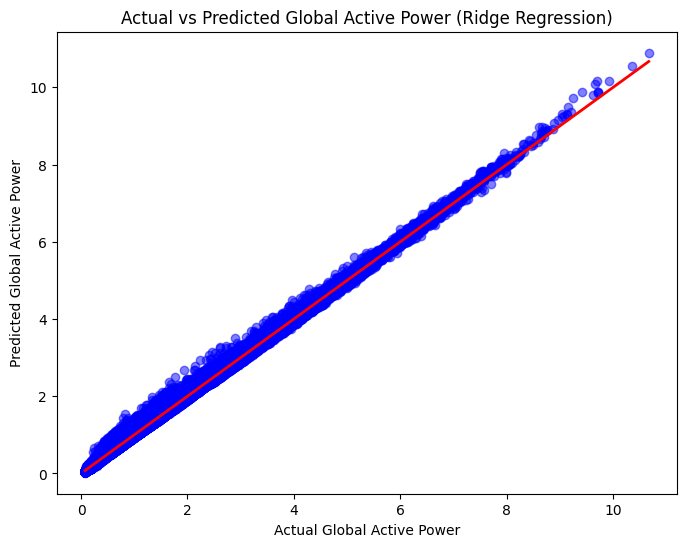

In [ ]:
from sklearn.linear_model import Ridge
# Train the Ridge Regression Model
# alpha is the regularization parameter; adjust it as needed (e.g., alpha=1.0)
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
# Make Predictions
y_pred = ridge_model.predict(X_test)
# Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, label='Ideal Fit')
plt.xlabel("Actual Global Active Power")
plt.ylabel("Predicted Global Active Power")
plt.title("Actual vs Predicted Global Active Power (Ridge Regression)")
plt.show()


**Observations :**

-> The above Scatter plot shows the results of a Ridge Regression model used to predict Global Active Power.

-> **Blue Dots :** Each dot shows the actual Global Active Power value on the x-axis and the corresponding predicted value on the y-axis.

-> **Red Line :** It is a diagonal line that represents perfect prediction. If all the blue dots were perfectly aligned on this line.

-> The blue dots are clustered tightly around the red line, indicating a **good fit.** The model's predictions are generally close to the actual values.

->  This model has helped in reducing the impact of multicollinearity, which can be a problem in regression models with many features.

-> This model is the **Best fit** for the Prediction of target values.

**Mean Squared Error (MSE): 0.0016377913737352966**

This is a very low value, indicating that the model's predictions are very close to the actual values. A lower MSE suggests better model performance.

**R-squared (R²): 0. 9985301207111756**

This value is very close to 1, which indicates that your model is explaining over **99%** of the variance in the target variable (Global_active_power). A value of 1 would mean perfect predictions, and 0 would mean the model explains none of the variance.

**Accuracy :** Ridge Regression Shows the **99%** of Accuracy in predicting the values of Global_active_power.

**COMPARISION**

**Lasso Regression vs Ridge Regression :**

-> **Ridge Regression**  performs slightly better in terms of both **MSE and R²** in this specific case. This suggests that Ridge is better suited for this Prediction.

-> **Lasso Regression** could be preferred if feature selection is a priority, as it has the potential to remove irrelevant features.

**Final Comparision to Analyze which among  these three models are Best fit for the Prediction of Global_active_power.**

**Linear Regression vs Lasso Regression vs Ridge Regression :**

-> Linear Regression and Ridge Regression have the **same MSE**, making them the most accurate models in terms of prediction errors.

-> Lasso Regression has a slightly** higher MSE**, meaning its predictions are less accurate.

-> Linear Regression and Ridge Regression have the **same R²**, indicating that both models explain the same proportion of variance in the target variable.

-> Lasso Regression has a slightly** lower R²**, which could be due to feature elimination.


* Linear Regression and Ridge Regression have nearly identical performance, with **Ridge** being slightly more **advantageous** in case of multicollinearity, as it shrinks the coefficients without removing any features.

* Lasso Regression, while useful for feature selection, sacrifices predictive accuracy as it has  higher MSE and lower R².